In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv('mymoviedb.csv', lineterminator='\n')

In [ ]:
df.head()

In [ ]:
df.info()

In [ ]:
df['Genre'].head()

In [ ]:
df.duplicated().sum()

In [ ]:
df.describe()

In [ ]:
df.columns

Exploration Summary

we have a dataset consisting of 9827 rows and 9 columns.
our dataset looks a bit tidy with no NaN nor duplicate values.
1. release date column need to be casted into date time and extract only the year value
2. Dropping the columns Overview, Original language, URL
3. Vote average be categorized for proper analysis
4. Removing the white spaces from Genre column.

In [ ]:
#release date column need to be casted into date time and extract only the year value

df['Release_Date']=pd.to_datetime(df['Release_Date'])
print(df['Release_Date'].dtypes)

In [ ]:
#extracts the year part from each date.

df['Release_Date']= df['Release_Date'].dt.year
df['Release_Date'].dtypes

In [ ]:
df.head()

In [ ]:
cols = ['Overview', 'Original_Language', 'Poster_Url']
df.drop(cols, axis=1, inplace=True)

In [ ]:
df.head()

In [32]:
#Categorizing Vote_Average column

#creating a user defined function

def categorize_col(df,col,labels):
    edges=[df[col].describe()['min'],
           df[col].describe()['25%'],
           df[col].describe()['50%'],
           df[col].describe()['75%'],
           df[col].describe()['max']]
    
    df[col]=pd.cut(df[col], edges, labels=labels, duplicates='drop')
    return df


In [33]:
labels=['not popular','below_avg','average','popular']

categorize_col(df,'Vote_Average', labels)

df['Vote_Average'].value_counts()

KeyError: 'min'

In [ ]:
df['Vote_Average'].unique()

In [ ]:
df.dropna(inplace=True)
df.isna().sum()

In [ ]:
#we would split genre into list and then explode into data frame to have only one genre per row

df['Genre']=df['Genre'].str.split(', ')
df=df.explode('Genre').reset_index(drop=True)

In [ ]:
df.head()

In [ ]:
#Casting column into category

df['Genre']=df['Genre'].astype('category')
df['Genre'].dtypes

In [ ]:
df.info()

In [ ]:
df.nunique()

In [ ]:
df.head()

# Data visualization

In [ ]:
sns.set_style('whitegrid')

# What is the most frequent genre of movies released on Netflix?

In [ ]:
df['Genre'].describe()

In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.catplot(y='Genre', data=df, kind='count',
           order=df['Genre'].value_counts().index,
           color='red')
plt.title('Genre Column Distribution')
plt.show

# Which has the highest votes in vote_avg column?

<function matplotlib.pyplot.show(close=None, block=None)>

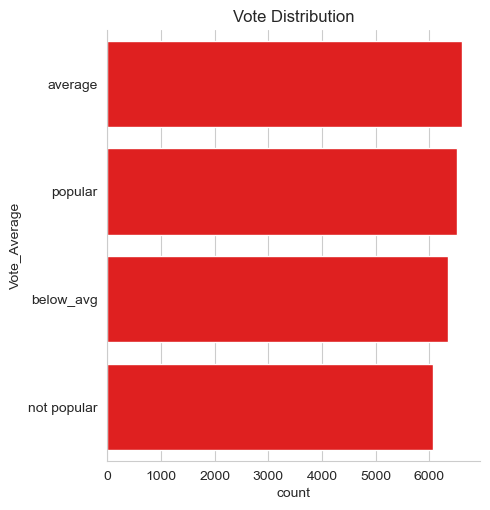

In [34]:
sns.catplot(y='Vote_Average', data=df, kind='count',
           order=df['Vote_Average'].value_counts().index,
           color='red')
plt.title('Vote Distribution')
plt.show

# What movie got the highest popularity? what's its genre?

In [35]:
df[df['Popularity']==df['Popularity'].max()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
0,2021,Spider-Man: No Way Home,5083.954,8940,popular,Action
1,2021,Spider-Man: No Way Home,5083.954,8940,popular,Adventure
2,2021,Spider-Man: No Way Home,5083.954,8940,popular,Science Fiction


# What movie got the highest popularity? what's its genre?

In [36]:
df[df['Popularity']==df['Popularity'].min()]

,Release_Date,Title,Popularity,Vote_Count,Vote_Average,Genre
25546,2021,The United States vs. Billie Holiday,13.354,152,average,Music
25547,2021,The United States vs. Billie Holiday,13.354,152,average,Drama
25548,2021,The United States vs. Billie Holiday,13.354,152,average,History
25549,1984,Threads,13.354,186,popular,War
25550,1984,Threads,13.354,186,popular,Drama
25551,1984,Threads,13.354,186,popular,Science Fiction


In [37]:
df.columns

Index(['Release_Date', 'Title', 'Popularity', 'Vote_Count', 'Vote_Average',
       'Genre'],
      dtype='object')

# which year has the most filmmed movies?

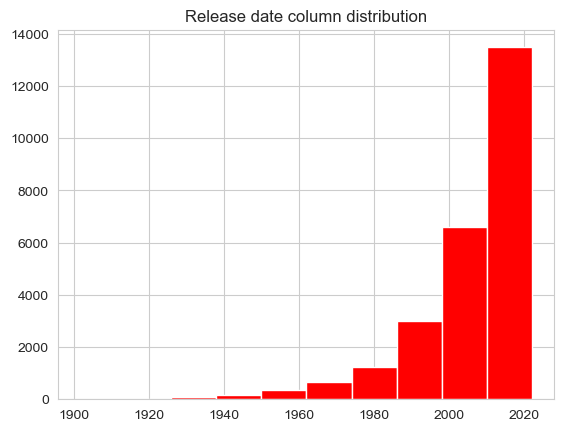

In [41]:
df['Release_Date'].hist(color='red')
plt.title('Release date column distribution')
plt.show()